## <span style="color:blue"> Computer Vision - Winter 2024

## <span style="color:blue"> Exercise 1 </span>
**Reichman University**

**Lecturer:** Prof. Yael Moses, RUNI

**TA:** Eyal Friedman, RUNI

**Submission date: 10.1.24** \
Note: In case you need an extension for any reason, you can submit it by 14.1.24. \
No extra extensions will be given.

**Your name: Orr Zwebner, Gidon Bonwit**
**Your ID: 203253422, 307920942**

In this exercise, you will practice basic image operations such as loading, saving, and displaying an image, getting familiar with 'numpy,' and understanding the benefits of vectorized operations in Python. This exercise contains three parts:

1. Image Convolution.
2. Implementing a classic Harris corner Detector.
3. Answering questions.

## <span style="color:blue"> Submission guidelines:</span>

1. Your **zip** file should include the following files only:
   - ex1.ipynb
   - images you use
2. You should use Jupyter Notebook.
3. Name the zip file **'ex1_ID_ID.zip'** and **do not** include any additional directories.
4. Submit using *Moodle*.
5. Submit on time!
6. You can submit this assignment in pairs (no triplets).
   * In the case of pair submission, both IDs and names should be added to the notebook.
   * One should submit the homework, and the other should submit a simple text file named: ID_ID.txt and nothing else.
   *Please make sure that your collaborator submits the HW.

## Read the following instructions carefully:

1. Write **efficient vectorized** code. When you think you cannot use vectorized code, give a short explanation of why.
2. You are responsible for the correctness of your code and should add as many tests as you see fit. Do not submit your tests unless requested.
3. Use `Python 3` and `numpy 1.18.5` or above. Changes to the configuration we provided are at your own risk. Before submitting the exercise, restart the kernel and run the notebook from start to finish to make sure everything works.
4. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only. Any other imports are forbidden unless provided by us.
5. Your code must run without errors. Note, **Code that fails to run will not be graded.**
6. Document your code properly.
7. Go over Warmup Python - you can find relevant python functions that will make your life easier.


## Honor Code:
The assignment is a basic tool for learning the material. You can probably find the solution on the web (including ChatGPT), however, you will not learn what you should learn from it. In addition, since we give grades on the assignment, using existing solutions will be considered dishonest.
In particular, you are not allowed to copy or use any code that solve the tasks. 
You are more than welcome to talk with your friends, but you are not allowed to give your code or answers and you are not allowed to use their code or answers. 
Remember – you take this course in order to learn.

## I declair that I respcet the honor code:
<span style="color:red"> Add here your names: Orr Zwebner, Gidon Bonwit


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d

# specify the way plots behave in jupyter notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 8.0) # set default size of plots
plt.rcParams['image.cmap'] = 'gray'


In [2]:
import platform
print("Python version: ", platform.python_version())
print("Numpy version: ", np.__version__)

Python version:  3.8.12
Numpy version:  1.20.3


## <span style="color:black">Section A: Convolution 
In this part, you will need to write a function **convolvedImage = convolutionMask(img,mask)**  which gets a 2D np.array of a grey level image and a convolution mask (Kernel) and output the convolved image with your mask. It also should plot  the original image and the convolved image side by side. Use captions on each image that indicates what you present. (Hint: see example in Warmup Python in Moodle)\
You may use the convolve2d function from scipy.signal.\
**Note:** Make sure that you understand the differences between correlation and convolution.\
Suggest a convolution mask for each of the 4 cases: 
    
1. Mask1:  a convolution mask (kernel)  that computes the average of a 5x5 pixels around each pixel. 
   
    
2. Mask2:  a convolution mask (kernel) of size *5×5* such that the maximal value over all possible grey level images (range 0 to 255) will be obtained in the center of a widnow that contains a black  shape region surrounded by white pixels (see the region below).  Note, the rest of the image may contain any values.

    The shape region:
    
   ``  
      255 255 255 255 255
     255  0  255 255 255
     255  0   0   0  255
     255  0   0  255 255
     255 255 255 255 255
     ``

3. Let '*' be a don't care value.\
    Mask3:  a mask as defined in  2 above  but for the following region:
    
    ``  
    0    0     0    0    0
    0    *    255   *    0
    0   255   255  255  255
    0    *    255   0    0
    0    0     0    0    0
      ``
4. Maks 4: a convolution mask (kernel)  that computes a 3 pixel shift of the image to the right.\
    You can ignore the results along the border of the image.

**Submit your function below**. 


In [3]:
# This function will be part your functions' test - do not change it
# You may add any helper function for your implementation and to write your code in the cell below

def test_A(imageName):
    img = cv2.imread(imageName, cv2.IMREAD_GRAYSCALE)

    convolvedImage1 = convolutionMask(img,mask1)
    
    convolvedImage2 = convolutionMask(img,mask2)
    
    convolvedImage3 = convolutionMask(img,mask3)
        
    convolvedImage4 = convolutionMask(img,mask4)

In [4]:
def test_B(imageName):  
    """
    A copy of test_A (we are not allowed to edit test_A) including the results of the masks

    Parameters:
    - imageName (string): a path to an image (in the same directory of the notebook)
    """
    img = cv2.imread(imageName, cv2.IMREAD_GRAYSCALE)

    convolvedImage1 = convolutionMask(img,mask1)
    
    convolvedImage2 = convolutionMask(img,mask2)
    
    convolvedImage3 = convolutionMask(img,mask3)
        
    convolvedImage4 = convolutionMask(img,mask4)
    
    convolvedImages = [convolvedImage1, convolvedImage2, convolvedImage3, convolvedImage4]
    
    #indicator for the mask
    i=1 
    
    #iterate over the masked imafeg
    for convolvedImage in convolvedImages:
        
        # show the images (original and masked) next to each other
        f, ((ax1, ax2)) = plt.subplots(1, 2, sharex='col', sharey='row')

        ax1.imshow(img), ax1.set_title('Original image')
        ax2.imshow(convolvedImage), ax2.set_title(f'masked_{i} image')
        
        
        # Remove axis numbers
        ax1.set_xticks([]), ax1.set_yticks([])
        ax2.set_xticks([]), ax2.set_yticks([])

        plt.show()
        
        #update the indicator
        i+=1
        
    return None

In [5]:
# For each call of the funtion, show on screen the result of your function.

def convolutionMask(img,mask):
    # mask using convolve2d 
    masked_image = convolve2d(img, mask, mode='same', boundary='fill', fillvalue=0)
    return masked_image

In [6]:
# Masks:
# Mask 1 - create a 5x5 matrix with 1/25 in each cell (average with no weights)
mask1 = np.full((5, 5), 1/25)

# Mask 2 - according to the given matrix. Any "white" pixel is weighted by 1 in the convolution mask,
    # and "black" is weighted as -1. Normalize according to the number of white pixels (19) to get 255 in the middle pixel

mask2 = np.array([[1, 1, 1, 1, 1],
                  [1, 1, -1, -1, 1],
                  [1, -1, -1, -1, 1],
                  [1, 1, 1, -1, 1],
                  [1, 1, 1, 1, 1]]) * 1/19


# Mask 3 - according to the given matrix. Any "white" pixel is weighted by 1 in the convolution mask,
    # and "black" is weighted as -1. Any don't care pixel is weighted as 0 (doesn't affect the convolution)
    # Normalize according to the number of white pixels (6) to get 255 in the middle pixel.
    
mask3 = np.array([[-1, -1, -1, -1, -1],
                  [-1, -1, 1, 0, -1],
                  [1, 1, 1, 1, -1],
                  [-1, 0, 1, 0, -1],
                  [-1, -1, -1, -1, -1]]) * 1/6

# Mask 4 - "copy" the value of the pixel that is 3 pixels to left using a mask
    # that contains only a '1' weight in that pixel (after reflection) and 0 in all the other pixels

mask4 = np.zeros((7,7))
mask4[3,6] = 1

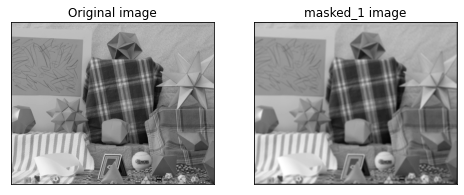

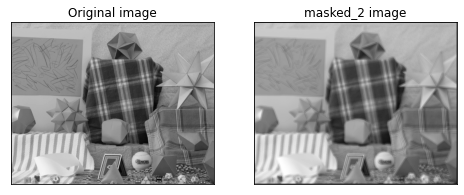

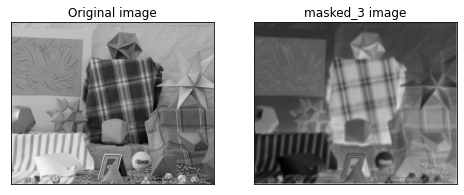

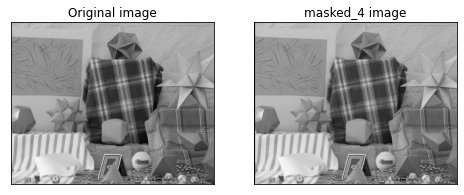

In [7]:
test_A(imageName='images/view0.tif')

# print and check your results - advicing you to check your code on trivial problems (toy problems)

#     A copy of test_A (we are not allowed to edit test_A) including the results of the masks
test_B(imageName='images/view0.tif')

## <span style="color:blue"> **Section B: Corner Detector**
    
In this section, you will implement the Harris corner detector as covered in class. Refer to the slides of the algorithm details.

Reference to the original paper: A COMBINED CORNER AND EDGE DETECTOR, Harris \& Stephens, Alvey Vision Conference, 1988

You will write the function:\
_Corners_ = H_corner(_im_, _σ _smooth_, _σ _neighb_, _th_, _density_size_, _display_).\
You may add additional parameters if necessary - list them and explain their role.

_im_: a grey-level image.\
_corners_: $k\times 2$ array that consists of the $x$ and $y$ coordinates of each of the $k$  detected corners.\
_display_: a binary parameter.\
Other parameters are described below.
    
    
## <span style="color:blue"> **B1 - Implement Harris**  
    
As part of the algorithm, you should implement the following:
    
1. Compute two kernels with the derivative of a Gaussian: **G_dx, G_dy  = Deriv_Gauss_xy(_sigma_)**.\
   **Note**:\
    (i) Refer to 'Warmup Python' for an example of defining a mask using a function. Modify the Gaussian example to a
    derivative of a Gaussian.\
    (ii) The mask_size should be around 6$\sigma_{smooth}$+1. 
    You can check and see if smaller or larger mask size affect the results. You can also look at the plot of the mask. The values close to the border of the masks should be close to zero. On the other hans, the border containing these values are not too wide. Think what it means if this is not the case.\
   **A question for thought (not for submission)**: what is the expected sum of the elements in the kernel? 
    
2. Using these masks compute two matrixes, $I_x$ and $I_y$, with the derivatives of the image in the $x$ and in the $y$ directions, respectively:\
    **Ix, Iy = Grad_xy(img,  $\sigma_{smooth}$)**
3. Compute the following three matrices: $I_x^2$, $I_y^2$,  $I_x$  and $I_y$.
4. Compute the four matrices, C11, C12, C22,  each corresponds to a different entry of the matrix for C for all pixels of the image. These matrices are computed by convolving the matrices computed in (3) with a Gaussian defined by $\sigma_{neighb}$.
4. Compute for each pixel, $q$ the eigen value and the eigen vector of its $C(q)$ matrix. Note that in this case you cannot perform it using vectorize operations.\
    or\
    Compute $d(q)= det(C)-k\cdot Trace(C)^2$.  For this case you will need an additional paramter $k$, but you can compute it efficiently using vectorize operations.
5. Threshold the small eignevalue of each pixel,  using the parameter $th$ (or do the same to $d(q)$).\
    Set to zero those pixles that are below the threshold.
6. For each region of size  denisty_size, leave the maximal small eigenvalue value (or smallest $d(q)$).

Return a list of corneres:  the indexes of the corners, and their strength.\
If display = 1, then display as part of the function (as in the class slides):\
a. The original image.\
b. The derivatives of the images, $I_x$ and $I_y$.
         (This is in addition to what is presented in the slides.)\
c. The values of the corner strength before appying the threshold. (Can be in greyscale rather than color. Make sure to normalize it for display.)\
d. The values of the corner strength after appying the threshold. (This should be a binary image.)\
e. The detected corners overlayed on the original image.




In [8]:
def derive_Gaussian(x, y,sig=1.0):
    """
    Returns a tuple of 2 values - a 2D Gaussian distribution (mu is 0, std is sig) directional derivatives.  

    Parameters:
    - x (float/int/array): the x coordinate
    - y (float/int/array): the y coordinate
    - sig (float): The std of the 2D Gaussian filter 
    """
    dx = (-x/(2*np.pi*sig**4))*np.exp(-(np.square(x) + np.square(y))/(2*sig**2))
    dy = (-y/(2*np.pi*sig**4))*np.exp(-(np.square(x) + np.square(y))/(2*sig**2))
    return dx,dy 



def Deriv_Gauss_xy(sigma=1):
    """
    Returns a tuple of 2 masks (matrices - 2D numpy arrays) that represents the Gaussian Filter, G_dx and G_dy.  

    Parameters:
    - sigma (integer): The std of the 2D Gaussian filter (defines the Gaussian, mu=0 as default)
    """
    
    # Make sure that sigma is an integer for the grid
    if isinstance(sigma, float):
        sigma = round(sigma)
        print(f"Sigma is a float and has been rounded to {sigma}.")

    
    # define the coordinates according to sigma - 6*sigma+1
    x = np.linspace(-3*sigma, 3*sigma, 6*sigma+1)
    y = np.linspace(-3*sigma, 3*sigma, 6*sigma+1)
    
    # Create a grid of coordinates (integers)  
    x, y = np.meshgrid(x, y)  
    
    return derive_Gaussian(x,y, sig=sigma) 



def Grad_xy(img=None,  sigma_smooth=1):
    """
    Returns 2 matrices (2D numpy arrays): the gradients over x and y of the image according to Gaussian filter.
    
    Parameters:
    - img (2D numpy array): a 2 dimension matrix that represnts a grayscale of an image. Motice there is no RGB dimension.
    - sigma_smooth (integer): The std of the 2D Gaussian filter. Defines how much to smooth the image before deriving (higher sigma higher smoothing)
    """
    
    # Ceate Gaussian filters (x and y axes)
    G_dx, G_dy = Deriv_Gauss_xy(sigma=sigma_smooth)
    
    # Calculate the Gradient in the x axe using the Gaussian filter
    Ix = convolutionMask(img=img, mask=G_dx)
    
    # Calculate the Gradient in the y axe using the Gaussian filter
    Iy = convolutionMask(img=img, mask=G_dy)
    
    return Ix, Iy 


def Gaussian_mask(sigma=1):
    """
    Returns a matrix (2D numpy array) of length 6*sigma+1: the Gaussian filter
    
    Parameters:
    - img (2D numpy array): a 2 dimension matrix that represnts a grayscale of an image. Motice there is no RGB dimension.
    - sigma (integer): The std of the 2D Gaussian filter. Defines how smoothing the mask will be.
    """
    # define the coordinates according to sigma - 6*sigma+1
    x = np.linspace(-3*sigma, 3*sigma, 6*sigma+1)
    y = np.linspace(-3*sigma, 3*sigma, 6*sigma+1)
    
    # Create a grid of coordinates (integers)  
    x, y = np.meshgrid(x, y)
    
    # Caulculate Gaussian function 
    Gausian_Kernel = (1/(2*np.pi*sigma**2))*np.exp(-(np.square(x) + np.square(y))/(2*sigma**2))
    
    # Return a normalized mask
    return Gausian_Kernel / np.sum(Gausian_Kernel)



def squared_derivatives(Ix, Iy):
    """
    Returns a tuple of 3 matrices (2D numpy arrays): the submatrices Ix^2, Iy^2, Ix*Iy (for the Harris Matrix)
    
    Parameters:
    - Ix (2D numpy array): the gradients over x direction
    - Iy (2D numpy array): the gradients over y direction
    """
    
    Ix_square = Ix ** 2
    Iy_square = Iy ** 2
    IxIy = Ix * Iy
    
    return Ix_square, Iy_square, IxIy




# Function to compute d(q) for each pixel
def ComputeDq(Ix, Iy, sigma_neigh=1,  k=0.04):
    """
    Returns a Matrix (2D numpy arrays) that containts dq for each pixel
    
    Parameters:
    - Ix (2D numpy array): the gradients over x direction
    - Iy (2D numpy array): the gradients over y direction
    - sigma_neigh (integer): The std of the 2D Gaussian filter. Defines how smoothing the mask will be.
    - k (float): Weight of the trace when  calculating dq
    """
    # Calculate the squared derivatives matrices
    Ix_square, Iy_square, IxIy = squared_derivatives(Ix, Iy)
    
    # Crate a Gaussian Mask
    Gausian_Kernel = Gaussian_mask(sigma=sigma_neigh)
    
    # Submatrices of C
    C11 = convolutionMask(Ix_square,Gausian_Kernel)
    C12 = convolutionMask(IxIy,Gausian_Kernel)
    C22 = convolutionMask(Iy_square,Gausian_Kernel)
    
    # Compute the Determinant and the Trace
    det_C = C11 * C22 - C12**2
    trace_C = C11 + C22
    
    # Compute Dq matrix according to Harris algorithm
    Dq = det_C - k * trace_C**2
    
    return Dq


def Find_corners(Dq, th=27, density_size=20, statistic_th=False):
    """
    Returns a list of tuples, where each tuple contains a coordinate (tuple) and a dq value (float)
    
    Parameters:
    - Dq (2D numpy array): a Matrix (2D numpy arrays) that containts dq for each pixel
    - th (float): threshold for dq 
    - density_size (int): size of a "neighborhood" (from each neighborhood, only 1 pixel can be detected as a corner) 
    - statistic_th (boolean): if True then th is percentage [0,100) of the dq value in the matrix Dq [0,100). If False it is absolute value.
    """
    # List of Corners
    corners = []
    unthreshold_corners = []
    
    if statistic_th:
        th = np.percentile(Dq, th)
    
    # Save variables to iterate over Dq
    rows, cols = Dq.shape

    # Iterate over Dq's submatrices of density_size*density_size (neighborhoods). Iterate Using 2 nested for loops - 
    # There is no efficent vectorized way of iterating over submatrices, and it is only 2 nested loops (pretty efficient)
    for i in range(1, rows - density_size + 1, density_size-1):
        for j in range(1, cols - density_size + 1, density_size-1):
            neighborhood = Dq[i:i + density_size, j:j + density_size]

            # Check that there are non-zero elements in the submatrix 
            if not np.all(neighborhood == 0):
                
                # save the maximum dq - value and position
                max_dq = np.max(neighborhood)
                max_pos = np.unravel_index(np.argmax(neighborhood), neighborhood.shape)
                
                # Adjusting max_pos to the coordinates in the original matrix
                unthreshold_corners.append(((i + max_pos[0], j + max_pos[1]), max_dq))
                
                # apply the threshold 
                if max_dq > th:
                    corners.append(((i + max_pos[0], j + max_pos[1]), max_dq))

    return corners, unthreshold_corners
    

    
def display_results(img, corners, unthreshold_corners, Ix, Iy):
    """
    Display the followings:
    a. The original image.
    b. The derivatives of the images, 𝐼𝑥 and  𝐼𝑦
    c. The values of the corner strength before appying the threshold. 
    d. The values of the corner strength after appying the threshold.
    e. The detected corners overlayed on the original image.
    
    Parameters:
    - img (2D numpy array): a 2 dimension matrix that represnts a grayscale of an image. Motice there is no RGB dimension.
    - corners (list): list of tuple [coordinates(tuple) and dq(float)] of corners in the input image (after applying threshold)
    - unthreshold_corners (list): list of tuple [coordinates(tuple) and dq(float)] of corners in the input image (before applying threshold)
    - Ix (2D numpy array): the gradients over x direction
    - Iy (2D numpy array): the gradients over y direction    - k (float): Weight of the trace when  calculating dq
    """ 
    
    # Display:
    #     a. The original image.
    #     b. The derivatives of the images, 𝐼𝑥 and  𝐼𝑦
    
    # show the images (original and masked) next to each other
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), sharex='col', sharey='row')

    # Display the new image in the first subplot
    ax1.imshow(img), ax1.set_title('Original Image')

    ax2.imshow(Ix), ax2.set_title('Ix Image')
    ax3.imshow(Iy), ax3.set_title(f'Iy Image')

    # Remove axis numbers
    ax1.set_xticks([]), ax1.set_yticks([])
    ax2.set_xticks([]), ax2.set_yticks([])
    ax3.set_xticks([]), ax3.set_yticks([])
    
    plt.show()


    # Display:     
    #     c. The values of the corner strength before appying the threshold. 
    #     d. The values of the corner strength after appying the threshold.
    
    detected_corners_dq_before = display_corners(img=img, corners_list=unthreshold_corners)
    detected_corners_dq_after = display_corners(img=img, corners_list=corners)
    f, (ax4, ax5) = plt.subplots(1, 2, figsize=(20, 10))  # Adjust size as needed
    
    ax4.imshow(detected_corners_dq_before), ax4.set_title('Detected Corners Before Threshold')
    ax5.imshow(detected_corners_dq_after), ax5.set_title('Detected Corners After Threshold')

    ax4.set_xticks([]), ax4.set_yticks([])
    ax5.set_xticks([]), ax5.set_yticks([])

    plt.show()
    
    # Display:     
    #     e. The detected corners overlayed on the original image.

    img_rgb=draw_corners(img=img, corners=corners)
    plt.figure(figsize=(6, 6))
    plt.imshow(img_rgb)
    plt.title("Detected Corners Overlayed on the Image")  # Adding a title
    plt.axis('off')  # Remove axis ticks
    plt.show()
        
    
    
def draw_corners(img, corners):
    """
    Display the detected corners overlayed on the original image.
    
    Parameters:
    - img (2D numpy array): a 2 dimension matrix that represnts a grayscale of an image. Motice there is no RGB dimension.
    - corners (list): list of tuple [coordinates(tuple) and dq(float)] of corners in the input image (after applying threshold)
    """ 
    # Convert grayscale image to RGB
    img_rgb = np.stack((img,)*3, axis=-1)

    # Draw Red dots for each corner
    for corner in corners:
        y, x = corner[0]  # Swap x and y for correct indexing
        
        # Ensure we stay within image bounds
        img_rgb[max(y-2, 0):min(y+3, img_rgb.shape[0]), max(x-2, 0):min(x+3, img_rgb.shape[1]), 0] = 255  # Red channel
        img_rgb[max(y-2, 0):min(y+3, img_rgb.shape[0]), max(x-2, 0):min(x+3, img_rgb.shape[1]), 1] = 0.0  # Green channel
        img_rgb[max(y-2, 0):min(y+3, img_rgb.shape[0]), max(x-2, 0):min(x+3, img_rgb.shape[1]), 2] = 0.0  # Blue channel
    
    return img_rgb
    
    
    
def display_corners(img, corners_list):
    """
    Returns a 2D np.array with white pixels (relativley to the strength of the corner)
    
    Parameters:
    - img (2D numpy array): a 2 dimension matrix that represnts a grayscale of an image. Motice there is no RGB dimension.
    - corners_list (list): list of tuple [coordinates(tuple) and dq(float)] of corners in the input image (after applying threshold)
    """
    
    # List of the dq strngths
    strengths = [corner[1] for corner in corners_list]

    # Normalize strengths to 1-255 by (10,90) percentile
    normalized_strengths = np.interp(strengths, (np.percentile(np.array(strengths), 20), 
                                                 np.percentile(np.array(strengths), 80)), (1, 255))
    
    # extract coordinates using the input list (the first element in the tuple - every element in the list is a tuple )
    coordinates = [corner[0] for corner in corners_list]

    # Create a black image with the same dimensions as 'img'
    height, width = img.shape
    background_image = np.zeros((height, width), dtype=np.uint8)

    # Draw the pixels on the background image according to their normalized strength
    for coord, strength in zip(coordinates, normalized_strengths):
        x, y = coord
        background_image[x, y] = int(strength)
                
    return background_image




def H_corner(img, sigma_smooth=1, sigma_neigh=1, k=0.04, th=27, density_size=5, display=1, statistic_th=False):
    """
    Returns a list of tuple [coordinates(tuple) and dq(float)] that represents corners in the input image
    
    Parameters:
    - img (2D numpy array): a 2 dimension matrix that represnts a grayscale of an image. Motice there is no RGB dimension.
    - sigma_smooth (integer): The std of the 2D Gaussian filter. Defines how much to smooth the image before deriving (higher sigma higher smoothing)
    - sigma_neigh (integer): The std of the 2D Gaussian filter. Defines how smoothing the mask will be.
    - k (float): Weight of the trace when  calculating dq
    - th (float): threshold for dq 
    - density_size (int): size of a "neighborhood" (from each neighborhood, only 1 pixel can be detected as a corner) 
    - display(int): binary integer, wether to display the coreners on top of the original image
    - statistic_th (boolean): if True then th is percentage [0,100) of the dq value in the matrix Dq [0,100). If False it is absolute value.    """
    
    # If we chose statistic_th - check that th is a legal percentage
    if statistic_th:
        if th<0 or th >=100 :
            print(f'th {th} is not a legal percentage threshold')
            return
        
        
    # Compute the gradient matrices
    Ix, Iy = Grad_xy(img,  sigma_smooth=sigma_smooth)

    # Compute Dq
    Dq = ComputeDq(Ix, Iy, k=k)

    # Find the corners in each neighborhood
    corners, unthreshold_corners = Find_corners(Dq, th=th, density_size=density_size, statistic_th=statistic_th)
    
    if display==1:
        display_results(img=img, corners=corners, unthreshold_corners=unthreshold_corners, Ix=Ix, Iy=Iy)
    
    
    return corners
    

## <span style="color:blue"> **B2 - Apply and explore**. 
In this part you will apply your Harris corner detector and explore its parameters 
Test:
1. Write a script that produces all the required tests.  
2. Suggest a synthetic image to test your algorithm, and present both the image and the results.
3. Test your functions on an image of your choice, exploring various parameters to achieve a 'good' result.\
    Display the results using different parameter values. Provide two images for each parameter to demonstrate its effect on the results. Use the 'title()' function to clarify which pair of parameters is used.
5. Summarize the effects of each parameter on corner detection in your answer.
6. Choose a set of parameters and apply the algorithm to the two images:  view0.tif and view6.tif.
Determine whether the same corners appear in both images. If not, mark an example of a corner that appears on one of the images and not on the other. Provide a possible explanation for why a corner was not found in the other image.
7. List the 3 most interesting things that you learned from this assignment.
8. What was the most non-trivial part of the assignent.

**Submit below as a text or as uploaded image of your text written in a different format**


### B.2.1

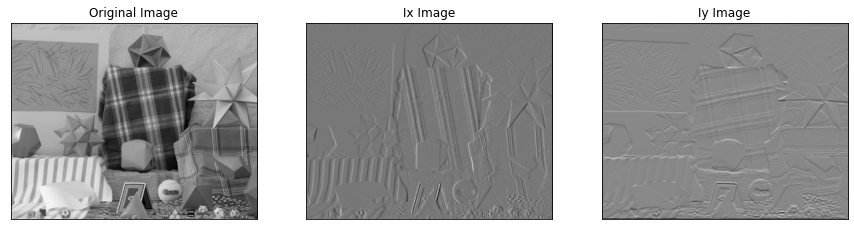

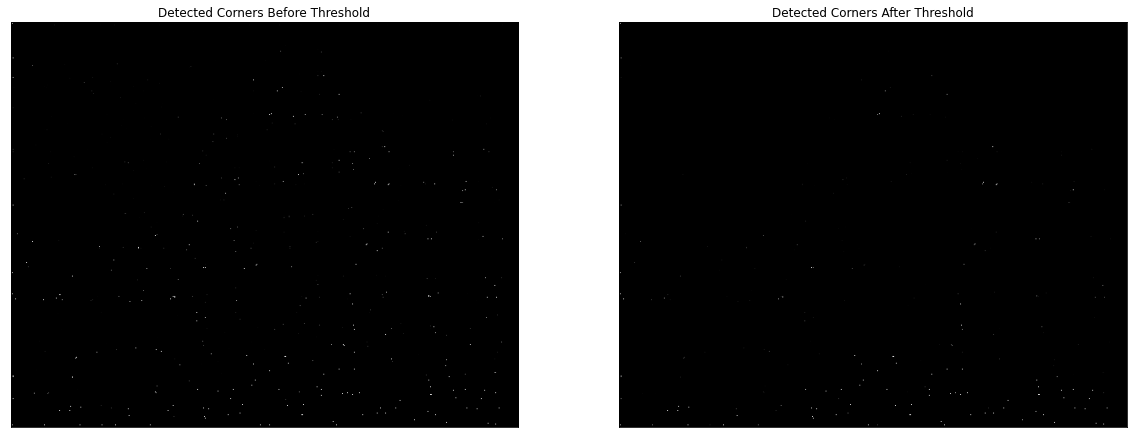

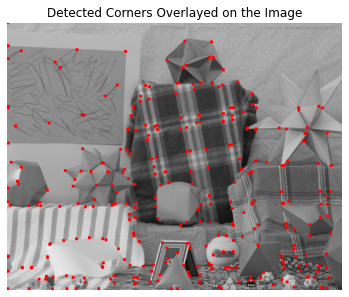

In [9]:
img = cv2.imread('images/view0.tif',  cv2.IMREAD_GRAYSCALE)
corners = H_corner(img, sigma_smooth=1, sigma_neigh=1, k=0.04, th=95, density_size=20,display=1, statistic_th=True)

###  B2.2

In [10]:
# Creating a synthetic image in order to test our code.
# The synthetic image we chose to create is a Checkboard that has corners, edges and the density size can determin how many corners will be 

# Define the size of the image
image_size = 256

# Create a checkerboard pattern
checkerboard = np.zeros((image_size, image_size), dtype=np.uint8)

# Define the size of each square in the checkerboard
square_size = 32

# Fill the checkerboard pattern with alternating squares
for i in range(0, image_size, square_size):
    for j in range(0, image_size, square_size):
        checkerboard[i:i+square_size, j:j+square_size] = 255 * ((i // square_size + j // square_size) % 2)

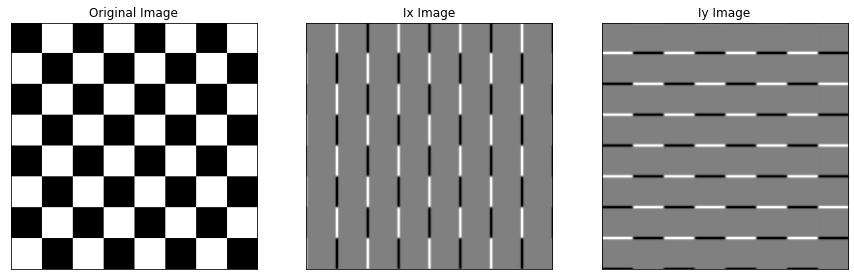

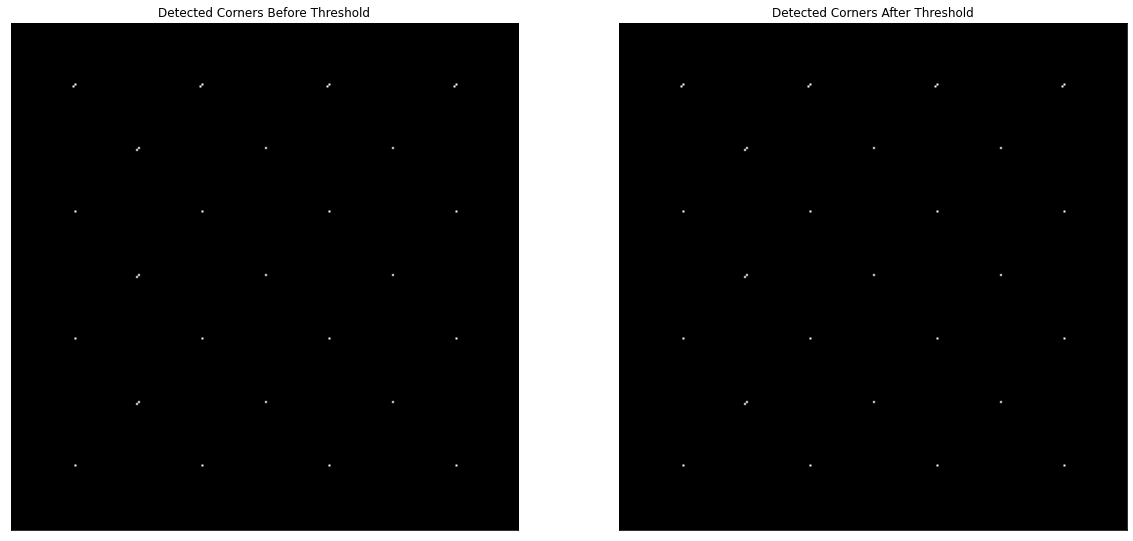

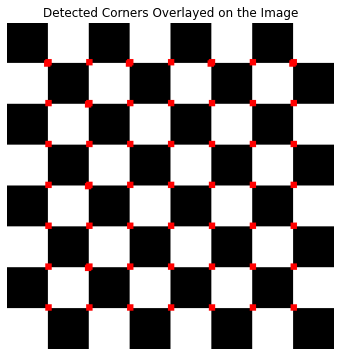

In [11]:
#Testing the algorithem on the checkerboard

corners = H_corner(checkerboard, sigma_smooth=1, sigma_neigh=1, k=0.05, th=85, density_size=32, statistic_th=True)

### B2.3

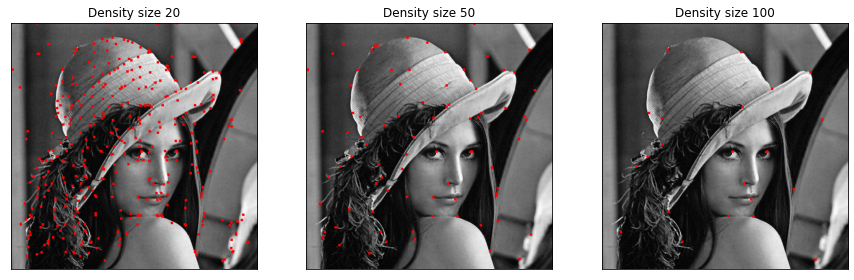

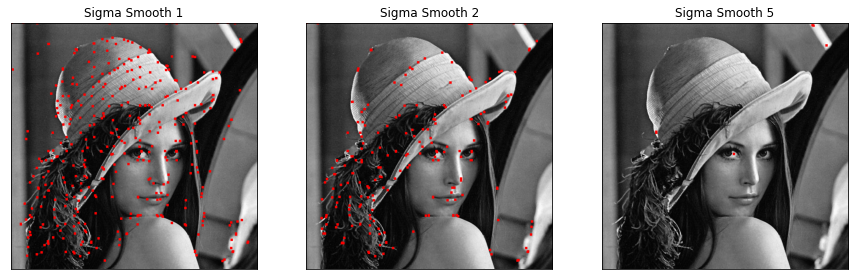

In [12]:
# Testing our functions on an image, exploring various parameters 
# we chose the paramters threshold and sigma smooth


img_lena = cv2.imread('images/Lena.png', cv2.IMREAD_GRAYSCALE)
sigma_smooth_list = [1,2,5]

#  Creating the pictures with the highlighted corners with different density size
corners_density20 = H_corner(img_lena, sigma_smooth=1, sigma_neigh=1, k=0.04, th=85, density_size=20, display=0, statistic_th=True)
corners_density50 = H_corner(img_lena, sigma_smooth=1, sigma_neigh=1, k=0.04, th=85, density_size=50, display=0, statistic_th=True)
corners_density100 = H_corner(img_lena, sigma_smooth=1, sigma_neigh=1, k=0.04, th=85, density_size=100, display=0, statistic_th=True)

img_lena_density20 = draw_corners(img_lena, corners_density20)
img_lena_density50 = draw_corners(img_lena, corners_density50)
img_lena_density100 = draw_corners(img_lena, corners_density100)

# show the images next to each other
    
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), sharex='col', sharey='row')

ax1.imshow(img_lena_density20), ax1.set_title('Density size 20')
ax2.imshow(img_lena_density50), ax2.set_title('Density size 50')
ax3.imshow(img_lena_density100), ax3.set_title('Density size 100')

# Remove axis numbers
ax1.set_xticks([]), ax1.set_yticks([])
ax2.set_xticks([]), ax2.set_yticks([])
ax3.set_xticks([]), ax3.set_yticks([])
    
plt.show()

#  Creating the pictures with the highlighted corners with different sigma smooth (statistical_th is False in order to show a change while changing sigma, thus an absolute th is assigned - can change a little bit the corner detection)
corners_sigma_smooth1 = H_corner(img_lena, sigma_smooth=1, sigma_neigh=1, k=0.04, th=50, density_size=20, display=0, statistic_th=False)
corners_sigma_smooth2 = H_corner(img_lena, sigma_smooth=2, sigma_neigh=1, k=0.04, th=50, density_size=20, display=0, statistic_th=False)
corners_sigma_smooth5 = H_corner(img_lena, sigma_smooth=5, sigma_neigh=1, k=0.04, th=50, density_size=20, display=0, statistic_th=False)

img_lena_sigma1 = draw_corners(img_lena, corners_sigma_smooth1)
img_lena_sigma2 = draw_corners(img_lena, corners_sigma_smooth2)
img_lena_sigma5 = draw_corners(img_lena, corners_sigma_smooth5)
    
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), sharex='col', sharey='row')

ax1.imshow(img_lena_sigma1), ax1.set_title('Sigma Smooth 1')
ax2.imshow(img_lena_sigma2), ax2.set_title('Sigma Smooth 2')
ax3.imshow(img_lena_sigma5), ax3.set_title('Sigma Smooth 5')

# Remove axis numbers
ax1.set_xticks([]), ax1.set_yticks([])
ax2.set_xticks([]), ax2.set_yticks([])
ax3.set_xticks([]), ax3.set_yticks([])
    
plt.show()



### B.2.4

The relationship between the density size parameter and the number of detected corners in the Harris corner detection algorithm is influenced by how corners are defined and identified within local regions of the image. Here's an explanation:

1. Density Size Parameter:
   - Definition: Density size refers to the size of the local neighborhood or patch that is examined for corner detection.
   - Effect on Corner Density: Increasing the density size implies that larger patches or regions are considered during corner detection.

2. Corner Representation:
   - Fewer Corners per Density Size: With larger density sizes, there is a tendency to have fewer patches in the image, and each of these patches may contain only one representative corner.
   - Reduced Corner Density: The algorithm associates each density-sized patch with a limited number of corners, leading to a reduction in the overall corner density.

In summary, larger density sizes involve examining larger regions, potentially causing some corners to be underrepresented.

The relationship between the sigma smooth parameter and the number of detected corners in the Harris corner detection algorithm is influenced by the smoothing effect of the Gaussian filter applied to the image

1. Smoothing Effect:
   - Higher Sigma Smooth: Increasing the sigma smooth parameter results in a larger standard deviation for the Gaussian filter. This, in turn, leads to a more extensive smoothing effect on the image.
   - Smoothing Impact:* Smoothing effectively reduces high-frequency variations and details in the image. Corners in an image are characterized by rapid changes in intensity, and smoothing tends to blur these transitions.

2. Thresholding and Response Values:
   - Harris Corner Response: The Harris corner detection algorithm calculates a corner response at each pixel, based on the gradients and second-moment matrix.
   - Thresholding:* The corner response values are then thresholded to identify significant corners.
   - Impact of Smoothing: With higher sigma smooth values, the smoothed image tends to have lower corner response values due to the blurring of intensity changes. As a result, fewer values pass the threshold, leading to a reduction in the number of detected corners.

In essence, higher sigma smooth values contribute to a smoother image, which can diminish the intensity variations that characterize corners. This smoothing effect influences the corner response values and, subsequently, the thresholding step, causing fewer corners to be detected.

### B.2.5

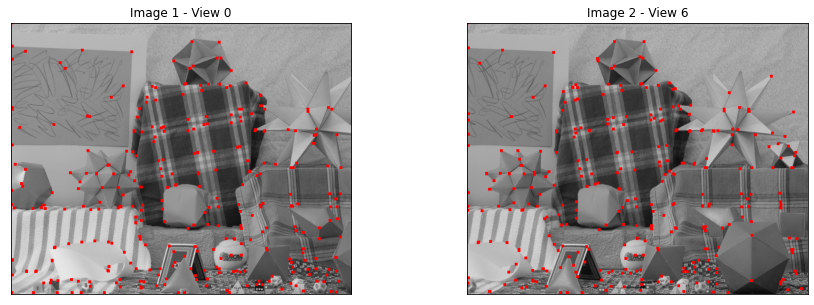

In [13]:

# Choose a set of parameters and apply the algorithm to the two images: view0.tif and view6.tif.
# Determine whether the same corners appear in both images. If not, mark an example of a corner that appears on one of the images and not on the other.
# Provide a possible explanation for why a corner was not found in the other image.

img_view0 = cv2.imread('images/view0.tif', cv2.IMREAD_GRAYSCALE)
img_view6 = cv2.imread('images/view6.tif', cv2.IMREAD_GRAYSCALE)

sigma_smooth = 1
sigma_neigh = 1
k = 0.04
density_size = 20
th = 95

corners_view0 = H_corner(img_view0, sigma_smooth, sigma_neigh, k, th, density_size, display=0, statistic_th=True)
cornered_image_view0 = draw_corners(img_view0, corners_view0)

corners_view6 = H_corner(img_view6, sigma_smooth, sigma_neigh, k, th, density_size, display=0, statistic_th=True)
cornered_image_view6 = draw_corners(img_view6, corners_view6)

f, (ax1, ax2,) = plt.subplots(1, 2, figsize=(15, 5), sharex='col', sharey='row')

# Display the new image in the first subplot
ax1.imshow(cornered_image_view0), ax1.set_title('Image 1 - View 0')
ax2.imshow(cornered_image_view6), ax2.set_title('Image 2 - View 6')

# Remove axis numbers
ax1.set_xticks([]), ax1.set_yticks([])
ax2.set_xticks([]), ax2.set_yticks([])
ax3.set_xticks([]), ax3.set_yticks([])
    
plt.show()



### <span style="color:blue"> **Question B2.6** 

We have two images – View6 and View7. These two images are of the same room/objects, only taken from different points of view, particularly with a shift to the right on the X-axis.

There are several corners detected in one image but not in the other, and the main reasons are:

The obvious one – the object is not present in the other image, as seen with those corners circled in dark blue.

When we change the point of view but keep the parameters identical, several things can happen – as circled in light blue:

- The strength of the corner will not be the same due to the Gaussian smoothing.

- The point may not be the maximum because other corners with higher values can be in the same patch.

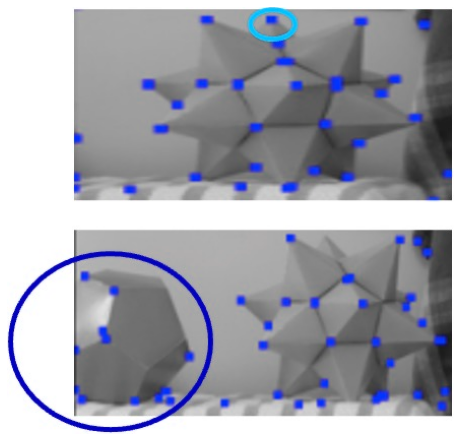

In [14]:
img = cv2.imread('images/Picture1.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

### <span style="color:blue"> **Question B2.7** 
    
The most interesting things we learned from the assignment:

1.Practical Usage of Convolution: We created a mask using the convolution operation. Although we learned about this operation and its efficiency, we hadn't seen a "true" usage of it until now. In the Harris detector algorithm (and generally in image processing), we used it to mask an image with a given mask.

2.Exploring Discrete Values of the Image: For the first time, we perceived an image as a matrix of numbers. In this assignment, after understanding that an image is essentially a matrix, we utilized mathematical tools such as derivatives, gradients, and Gaussian distribution to analyze and modify a given image. Practically, even though the image is discrete (and not continuous), with some assumptions and adjustments, we were able to apply these methods.

3.Importance of Parameters: Throughout the different sections of the assignment, we saw how significant the parameters are. We observed how a single parameter can change the entire algorithm's outcome, while others have a smaller effect. Furthermore, we determined that the threshold, a major parameter, could be fixed or statistical, depending on the given data. Additionally, not all parameters have a linear impact; some can exponentially affect the results.








### <span style="color:blue"> **Question B2.8** 


For us, the two most non-trivial parts of the assignment were:

Computing and Understanding DQ:

1.Computing Harris Matrix: It was challenging to grasp the significance of the submatrices C11, C22, C12, and their values.
Projecting the Values of C11, C22, C12: Calculating the determinants and the trace was intricate. It took us a while to understand that we could use the multiplication of each coordinate in the matrices (relatively).
Understanding the Matrix and Image Correlation: Comprehending how each value in the matrix, after convolution with a Gaussian, corresponds to a pixel in the image was complex. Specifically, understanding how the Dq matrix represents the extent to which a pixel is a corner.
    
2.'Frame Corners' Issue: The Harris corner detector, as taught in our class, does not refer to the frames of an image. This means, when deriving each pixel using a Gaussian gradient, we need to consider how to derive the frame of the corner in a one-way direction. The convolution process does not adequately address this issue without affecting the integrity of the entire masking operation. Additionally, we debated whether the frame should be detected as corners. After some research, we concluded that frame detection is a common issue with the Harris detector algorithm. Several potential solutions include:
    a. Ignoring the frame (edges) of the image.
    b. Applying additional edge smoothing.
    c. Adjusting the threshold.
    d. Applying a mask that excludes the image borders.
    e. Post-processing to filter out corners located on the frame (using coordinates).
We decided that solutions a, b, d, and e might impact the overall solution and result in missing "real" corners, especially those on the frame. Therefore, we chose not to implement these methods and instead adjusted the parameters (mostly the threshold) to eliminate most of the detected frame corners while preserving image corners. We believe this is a significant issue in the algorithm that should be addressed and discussed further, even in class. 